<a href="https://colab.research.google.com/github/wantepim84/NetworkX/blob/main/NetworkX_Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# Community Detection in NetworkX
import networkx.algorithms.community as nxcom
# Generate the network
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)

3

In [24]:
# Visualisation (helper functions required)
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [25]:
# visualize communities using color.
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [26]:
# Annotate nodes and edges with their communities
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

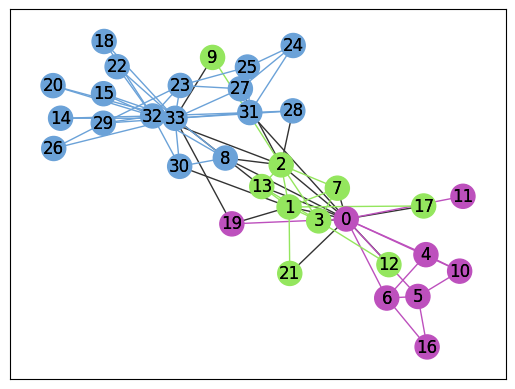

In [27]:
# Visualizes the karate club network
karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In [28]:
# An online social network(larger dataset)
# Load data file into network
from pathlib import Path
data_dir = Path('/content/facebook_combined.txt')
G_social = nx.read_edgelist(data_dir)

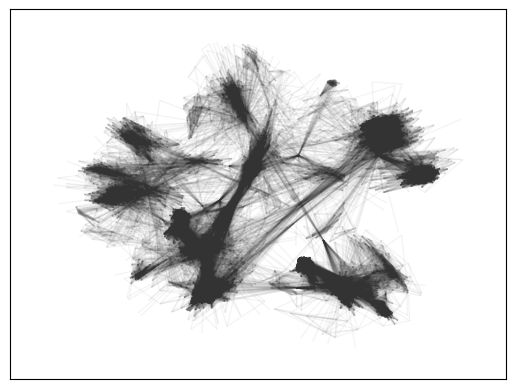

In [29]:
# Caluclate layout and draw
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)

In [30]:
# Use greedy_modularity_communities() to find those communities
communities = sorted(nxcom.greedy_modularity_communities(G_social),
                     key=len, reverse=True)
len(communities)

16

In [31]:
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

In [32]:
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = [get_color(G_social.edges[e]['community']) for e in internal]

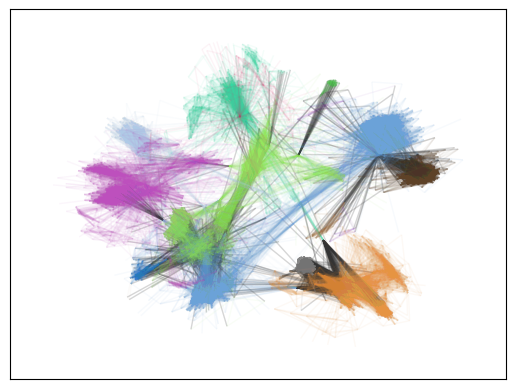

In [33]:
# Draw external edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)

In [34]:
# Girvan-Newman – betweenness-based communities
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

In [35]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [36]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

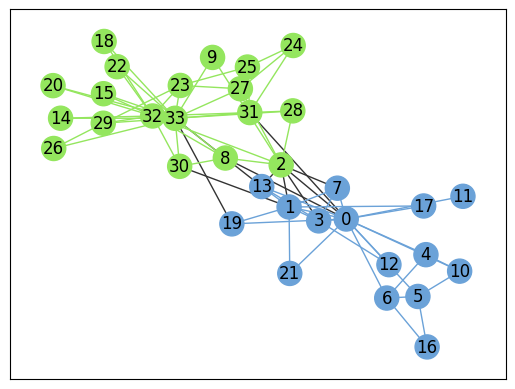

In [37]:
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(G_karate, pos=karate_pos, node_color=node_color,
                 edgelist=internal, edge_color=internal_color)

In [38]:
# To find a certain number of communites
import itertools
result = nxcom.girvan_newman(G_karate)
communities = next(itertools.islice(result, 2, 3))

In [39]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [40]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

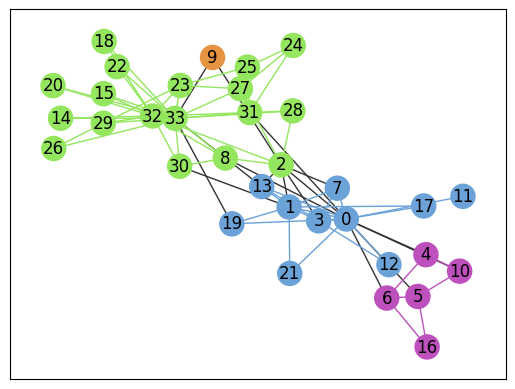

In [41]:
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

In [43]:
# Cliques- Use 'find_cliques@ function to identify cliques
cliques = list(nx.find_cliques(G_karate))
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [44]:
# Find maximum clique
max_clique = max(cliques, key=len)
max_clique

[0, 1, 2, 3, 13]

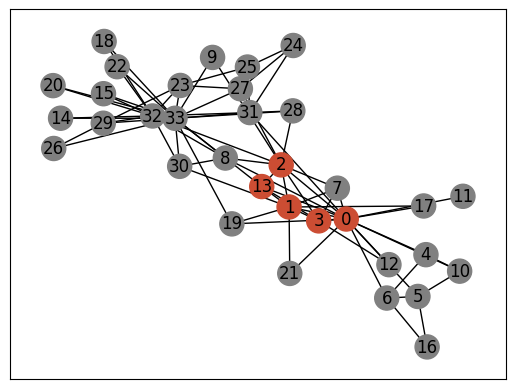

In [50]:
# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.8, 0.3, 0.2)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

In [51]:
#K cores - Use 'k-core' function
# Find k-cores
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

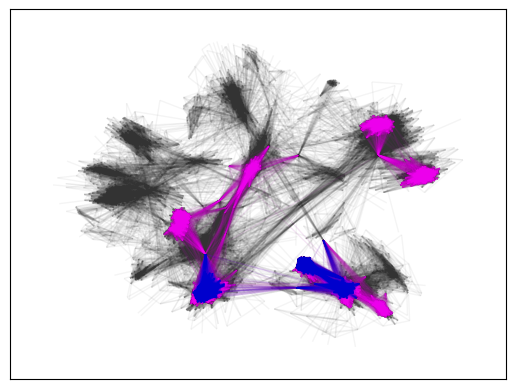

In [55]:
# Visualize network and k-cores-
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0, edge_color="#FF00FF", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0, edge_color="#0000CD", alpha=0.05, with_labels=False)
#This code draws the network three times: first, in its entirety (gray), then including just the 30-core (magenta), and then including just the 60-core (blue)